In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(style='ticks')

In [3]:
train_set=pd.read_csv('mushroom_train.csv')
test_set=pd.read_csv('mushroom_test.csv')

In [4]:
train_set.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,weight,ring-number,ring-type,spore-print-color,population,habitat
0,p,f,s,e,f,s,f,c,n,b,...,p,w,p,w,38,o,e,w,v,l
1,p,x,y,w,t,p,f,c,n,k,...,w,w,p,w,43,o,p,n,v,u
2,e,f,s,n,t,n,f,c,b,e,...,e,e,p,w,37,t,e,w,c,w
3,p,x,s,e,f,y,f,c,n,b,...,p,w,p,w,82,o,e,w,v,l
4,e,x,s,w,t,l,f,c,b,n,...,w,w,p,w,36,o,p,n,s,m


In [5]:
train_set.groupby(by=['cap-shape','class']).count()

cap-surface  cap-color  bruises  odor  gill-attachment  \
cap-shape class                                                           
b         e              278        278      278   278              278   
          p               34         34       34    34               34   
c         p                4          4        4     4                4   
f         e             1094       1094     1094  1094             1094   
          p             1085       1085     1085  1085             1085   
k         e              161        161      161   161              161   
          p              429        429      429   429              429   
s         e               23         23       23    23               23   
x         e             1389       1389     1389  1389             1389   
          p             1189       1189     1189  1189             1189   

                 gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  \
cap-shape class                                                                 
b         e               278        278         278          278         278   
          p                34         34          34           34          34   
c         p                 4          4           4            4           4   
f         e              1094       1094        1094         1094        1094   
          p              1085       1085        1085         1085        1085   
k         e               161        161         161          161         161   
          p               429        429         429          429         429   
s         e                23         23          23           23          23   
x         e              1389       1389        1389         1389        1389   
          p              1189       1189        1189         1189        1189   

                  ...     stalk-color-above-ring  stalk-color-below-ring  \
cap-shape class   ...                                                      
b         e       ...                        278                     278   
          p       ...                         34                      34   
c         p       ...                          4                       4   
f         e       ...                       1094                    1094   
          p       ...                       1085                    1085   
k         e       ...                        161                     161   
          p       ...                        429                     429   
s         e       ...                         23                      23   
x         e       ...                       1389                    1389   
          p       ...                       1189                    1189   

                 veil-type  veil-color  weight  ring-number  ring-type  \
cap-shape class                                                          
b         e            278         278     278          278        278   
          p             34          34      34           34         34   
c         p              4           4       4            4          4   
f         e           1094        1094    1094         1094       1094   
          p           1085        1085    1085         1085       1085   
k         e            161         161     161          161        161   
          p            429         429     429          429        429   
s         e             23          23      23           23         23   
x         e           1389        1389    1389         1389       1389   
          p           1189        1189    1189         1189       1189   

                 spore-print-color  population  habitat  
cap-shape class                                          
b         e                    278         278      278  
          p                     34          34       34  
c         p                      4           4        4  
f         e                   1094        1094     

In [6]:
train_set.shape

(5686, 25)

## Univariate Analysis

In [7]:
#for continuous variables
train_set.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


From the above table we infer that the maximum value of radius is way beyond the mean + 3*standard deviation,which implies the radius parameters has outlier which needs to be treated.

(array([ 4825.,   751.,    45.,     0.,     0.,     0.,    25.,     0.,
            0.,    40.]),
 array([  1.00000000e+00,   3.50900000e+02,   7.00800000e+02,
          1.05070000e+03,   1.40060000e+03,   1.75050000e+03,
          2.10040000e+03,   2.45030000e+03,   2.80020000e+03,
          3.15010000e+03,   3.50000000e+03]),
 <a list of 10 Patch objects>)

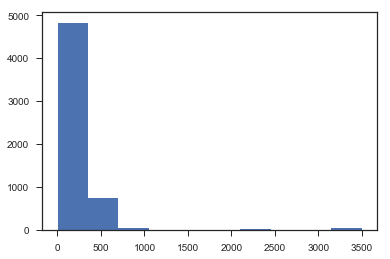

In [8]:
plt.hist(train_set.radius,bins=10)

We observe that that the radius of the majority of the mushrooms is in the approximate range of 0-600.

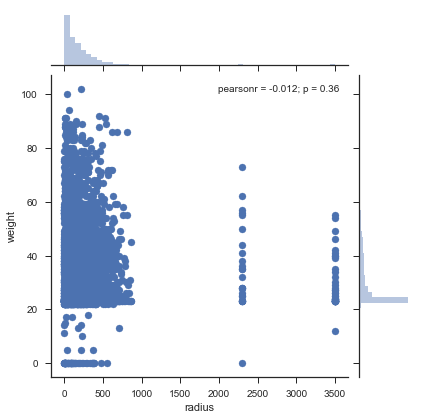

In [9]:
sns.jointplot(train_set.radius,train_set.weight) #jointplot to perform a bivariate visualisation of weight and radius

From the above jointplot we get an insight that the majority of the mushrooms are in a range of 0-650 units of radius,but are in the range of 20-100 units of weight.


### The above plot also give us an insight that the radius and weight have weak negative correlation.

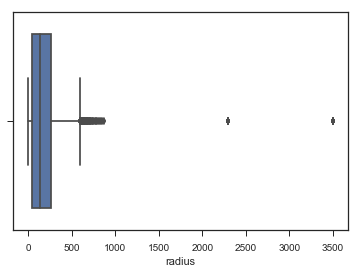

In [10]:
sns.boxplot(train_set.radius)


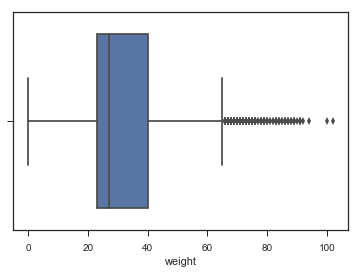

In [11]:
sns.boxplot(train_set.weight)

In [12]:
(train_set['radius']<650).value_counts()

True     5548
False     138
Name: radius, dtype: int64

#### From the above boxplot it is clear that the radius feature has a number of outliers which needs to be treated.
#### From the boxplot of weight we find that the numbers outside the quartile range 

In [13]:
train_set.corr() #checking the correlation between our continuous variables.

,radius,weight
radius,1.000000,-0.012035
weight,-0.012035,1.000000


##### The correlation between radius and weight is -0.012035.This means that they have moderately negative correlation.This observation works well with our insight from the above jointplot.

## For categorical variables using factorplot to see how the variable affects  the target class.

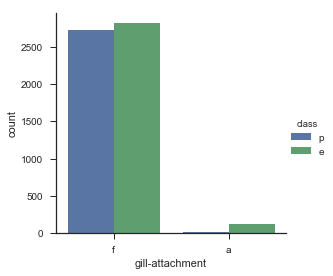

In [14]:
sns.factorplot('gill-attachment',data=train_set,kind='count',hue='class')


#### This gives us an important insight that most of the observations in our data have free gill-attachment and also that the  both classes poisonous and edible are almost equally distributed in this category,so this attribute is not  a good differentiating factor.

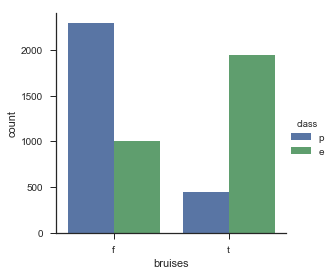

In [15]:
sns.factorplot('bruises',data=train_set,kind='count',hue='class')
#The presence of bruises does'nt follow a regular pattern but majority of poisonous show absence of bruises and vice-versa for
#edible ones.

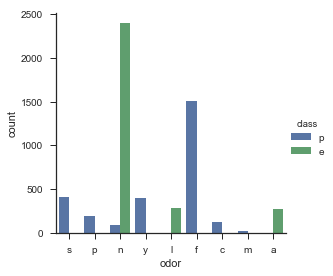

In [16]:
sns.factorplot('odor',data=train_set,kind='count',hue='class') #none is standalone edible #others are either edible or poisonous

#### Mushrooms with no odor are dominatingly edible.Also mushrooms with anise almond odors are all edible.Rest all odor types are all poisonous.Since this variables gives a very good differentiation between our two target classes so it will have more importance in our ML model.

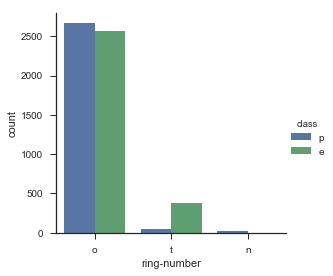

In [17]:
sns.factorplot('ring-number',data=train_set,kind='count',hue='class')
#this gives us that majority of the mushrooms have one ring.so this is not a much diff feature and not of much use for us for our
#problem.

In [18]:
train_set.columns

Index([u'class', u'cap-shape', u'cap-surface', u'cap-color', u'bruises',
       u'odor', u'gill-attachment', u'gill-spacing', u'gill-size',
       u'gill-color', u'stalk-shape', u'stalk-root', u'radius',
       u'stalk-surface-above-ring', u'stalk-surface-below-ring',
       u'stalk-color-above-ring', u'stalk-color-below-ring', u'veil-type',
       u'veil-color', u'weight', u'ring-number', u'ring-type',
       u'spore-print-color', u'population', u'habitat'],
      dtype='object')

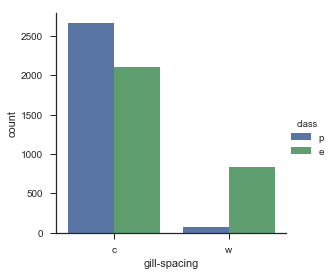

In [19]:
sns.factorplot('gill-spacing',data=train_set,kind='count',hue='class')
#From this plot we see,crowded gill-spacing are mostly found in edible type of mushrooms.
#Close gill-spacing are almost equal in both the edible and poisonous.
#Also distant gill-spacing is not found in any observation in the training set

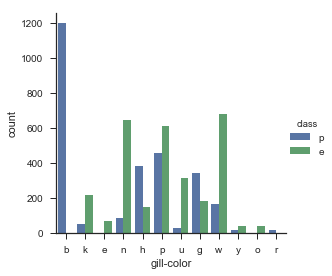

In [20]:
sns.factorplot('gill-color',data=train_set,kind='count',hue='class')
#Useful insight from this plot is that the buff gill-color is dominatingly poisonous.

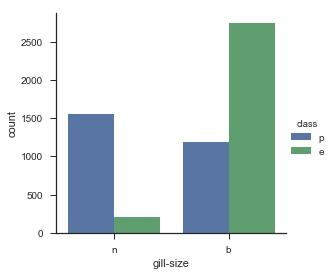

In [21]:
sns.factorplot('gill-size',data=train_set,kind='count',hue='class')

#### The above plot shows that the majority of edible mushrooms are found to have broad gill-size, and also that the poisonous mushrooms are almost equally distributed in both broad and narrow category. 

In [31]:
  train_set.describe() #outliers values outside mean+3*std.

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


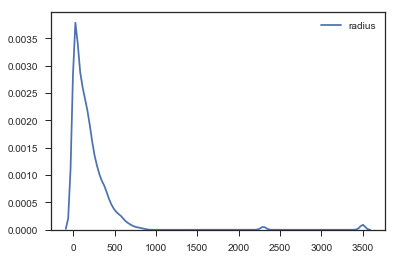

In [32]:
sns.kdeplot(train_set.radius) #The two very small peaks denote the two outliers of the radius variable.

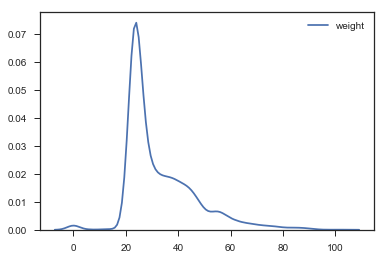

In [33]:
sns.kdeplot(train_set.weight)

In [22]:
train_set['radius'].sort_values(ascending=False).value_counts().sort_index(ascending=False).head(10)\
#no of outliers found to be 40+25=65

3500    40
2300    25
868      1
867      1
857      1
852      1
850      1
834      1
831      1
822      2
Name: radius, dtype: int64

Radius with values 2300 and 3500 can be treated as outliers.

In [24]:
train_set['weight'].sort_values(ascending=False).value_counts().sort_index(ascending=False)
#no of outliers found to be 2 which 
#wont have much effect on the mean so we dont need to treat the outlier of the weight variable.

102       1
100       1
94        1
92        1
91        4
90        1
89        5
88        3
87        4
86        6
85        3
84        5
83        7
82        2
81        2
80        5
79        8
78        6
77        2
76       12
75       10
74        7
73        8
72        8
71       11
70       11
69        8
68       15
67       16
66        8
       ... 
41       98
40      100
39       97
38      124
37      104
36      100
35      110
34      121
33       85
32      112
31      135
30      129
29      106
28      149
27      209
26      223
25      325
24      441
23     1524
22       81
18        1
17        2
15        1
14        2
13        2
12        1
11        1
10        1
5         3
0        51
Name: weight, Length: 83, dtype: int64

In [25]:
train_set.describe()

,radius,weight
count,5686.000000,5686.000000
mean,202.627682,33.012487
std,350.213032,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,259.000000,40.000000
max,3500.000000,102.000000


### Outlier treatment

In [27]:
#treating outliers for radius  
col=train_set.radius[train_set.radius<2300]

In [28]:
mean_new=col.mean()

In [29]:
train_set.radius[train_set.radius>=2300]=mean_new

C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
#after outlier treatment the mean changes to 169.83 for the radius variable from 202.
train_set.describe()

,radius,weight
count,5686.000000,5686.000000
mean,169.834727,33.012487
std,160.438596,13.379082
min,1.000000,0.000000
25%,38.000000,23.000000
50%,129.000000,27.000000
75%,249.000000,40.000000
max,868.000000,102.000000


#### Now we move to variable preprocessing for fitting into our model.

In [31]:
import sklearn

First as mentioned earlier since the two continuous variables radius and weights have different ranges we perform feature scaling to get a better predicition. 

In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
train_set_scale=min_max.fit_transform(train_set[['radius','weight']])
test_set_scale=min_max.fit_transform(test_set[['radius','weight']])

In [53]:
train_set['radius']=train_set_scale[:,0]
train_set['weight']=train_set_scale[:,1]


In [55]:
test_set['radius']=test_set_scale[:,0]
test_set['weight']=test_set_scale[:,1]

#### We scale the features so that the feature with a larger range does'nt affect the outcome.

#### Now we apply label encoding to our categorical variables.

In [57]:
from sklearn.preprocessing import LabelEncoder
lre=LabelEncoder()
for col in test_set.columns.values:
    
    if train_set[col].dtypes=='object':
        
        
        data=train_set[col].append(test_set[col])
        
        #using data to form an exhaustive list of levels
       
        
        lre.fit(data.values)
        train_set[col]=lre.transform(train_set[col])
       
        test_set[col]=lre.transform(test_set[col])
        


In [58]:
X_train=train_set[train_set.columns[train_set.columns!='class']]

In [59]:
Y_train=train_set[train_set.columns[train_set.columns=='class']]
Y_train=(Y_train=='p')*1

In [60]:
Y_train.head()

,class
0,1
1,1
2,0
3,1
4,0


### Now applying random forest algorithm to our dataset.

### First we apply Grid search method for parameter tuning

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
clf=RandomForestClassifier(random_state=0)
param_grid = { "n_estimators": [250, 300], "max_depth": [10, 20]}
grid_search = GridSearchCV(clf, param_grid)
grid_search.fit(X_train,Y_train)
print grid_search.best_params_


IndexError: too many indices for array

#### I am facing a problem in the using the gridsearch syntax which I am not able to figure out so I have randomly done so.

In [65]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train)

In [66]:
clf=RandomForestClassifier(n_estimators=100,random_state=5)
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
from sklearn.metrics import accuracy_score
print accuracy_score(y_test,pred)

C:\Users\HP\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


1.0


In [53]:
clf.feature_importances_

array([ 0.00617218,  0.01141824,  0.01957463,  0.04926865,  0.1422015 ,
        0.00175469,  0.06529537,  0.12386897,  0.09272398,  0.02312674,
        0.04763155,  0.0019305 ,  0.06126079,  0.05475902,  0.02205807,
        0.01749175,  0.        ,  0.00500521,  0.00058804,  0.01286877,
        0.0742003 ,  0.08319366,  0.0574224 ,  0.026185  ])

#### So the above feature importance array shows that the odor and gill-size attributes have the maximum impact in our model,which is similar to what inferred by visualization done above in the notebook.

In [67]:
# prediction for the test data set
pred=clf.predict(test_set)

In [69]:
pred #this is the final prediction for the test data set.

array([0, 1, 0, ..., 1, 1, 0])